This is going to be a Biodiversity in National Parks dataset. Usability score of 8.82, 

QUESTIONS I HAVE USING THIS DATASET:

I want to know if the biodiversity in National Parks has declined over the years, I also want to know if the size of the national park correlates with a greater amount of biodiversity. What percentage of species are not native to their respective national park?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


pd.set_option('display.width', 1000)


pd.set_option('display.max_colwidth', None)

In [3]:

nature_df = pd.read_csv("datasets/parks.csv")
animal_df = pd.read_csv("datasets/species.csv")

print(nature_df.columns.values)
print()
print(animal_df.columns.values)




['Park Code' 'Park Name' 'State' 'Acres' 'Latitude' 'Longitude']

['Species ID' 'Park Name' 'Category' 'Order' 'Family' 'Scientific Name'
 'Common Names' 'Record Status' 'Occurrence' 'Nativeness' 'Abundance'
 'Seasonality' 'Conservation Status' 'Unnamed: 13']


/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/1241497641.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  animal_df = pd.read_csv("datasets/species.csv")


In [4]:
new = animal_df.filter(items=['Park Name','Scientific Name','Common Names','Abundance','Conservation Status'], axis=1).head(51)
new

,Park Name,Scientific Name,Common Names,Abundance,Conservation Status
0,Acadia National Park,Alces alces,Moose,Rare,NaN
1,Acadia National Park,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, White-Tailed Deer",Abundant,NaN
2,Acadia National Park,Canis latrans,"Coyote, Eastern Coyote",Common,Species of Concern
3,Acadia National Park,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",NaN,Endangered
4,Acadia National Park,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Red Fox, Silver Fox",Common,NaN
5,Acadia National Park,Lynx canadensis,Canada Lynx,NaN,NaN
6,Acadia National Park,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",NaN,NaN
7,Acadia National Park,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",NaN,NaN
8,Acadia National Park,Lutra canadensis,"Otter, River Otter",Common,NaN
9,Acadia National Park,Martes pennanti,"Blackcat, Fisher, Pekan",Rare,NaN


In [33]:
animal_df.head(21)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, White-Tailed Deer",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Red Fox, Silver Fox",Approved,Present,Unknown,Common,Breeder,NaN,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN,NaN


Based on the data I see already on the existing columns, there seems to be a lot on Conservation Status and Seasonality. There is also a weird random column called Unnamed 13 which is giving NaN for all of the rows and columns so I definitely will probably remoe that

In [5]:
print("Missing Values Distribution:\n")
print(animal_df.isnull().mean())
print("\nColumn Data Types:\n")
animal_df.dtypes

Missing Values Distribution:

Species ID             0.000000
Park Name              0.000000
Category               0.000000
Order                  0.012344
Family                 0.012679
Scientific Name        0.000000
Common Names           0.227652
Record Status          0.000050
Occurrence             0.168908
Nativeness             0.210024
Abundance              0.360107
Seasonality            0.830966
Conservation Status    0.960435
Unnamed: 13            0.999958
dtype: float64

Column Data Types:



Species ID             object
Park Name              object
Category               object
Order                  object
Family                 object
Scientific Name        object
Common Names           object
Record Status          object
Occurrence             object
Nativeness             object
Abundance              object
Seasonality            object
Conservation Status    object
Unnamed: 13            object
dtype: object

In [6]:

def sample_group(group, n=3):
    return group.sample(n=min(len(group), n), random_state=1)


acadia = animal_df[animal_df["Park Name"] == "Acadia National Park"]


sampled_acadia = acadia.groupby("Category").apply(sample_group).reset_index(drop=True)

sampled_acadia



/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/2080398159.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_acadia = acadia.groupby("Category").apply(sample_group).reset_index(drop=True)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1433,Acadia National Park,Amphibian,Anura,Ranidae,Rana catesbeiana,Bullfrog,Approved,Present,Native,Common,Breeder,NaN,NaN
1,ACAD-1437,Acadia National Park,Amphibian,Anura,Ranidae,Rana sylvatica,Wood Frog,Approved,Present,Native,Common,Breeder,NaN,NaN
2,ACAD-1436,Acadia National Park,Amphibian,Anura,Ranidae,Rana pipiens,"Common Frog, Leopard Frog, Meadow Frog, Northern Leopard Frog",Approved,Not Present (Historical Report),Unknown,NaN,NaN,NaN,NaN
3,ACAD-1305,Acadia National Park,Bird,Passeriformes,Parulidae,Helmitheros vermivorus,Worm-Eating Warbler,Approved,Not Confirmed,Not Native,NaN,Vagrant,NaN,NaN
4,ACAD-1263,Acadia National Park,Bird,Passeriformes,Hirundinidae,Progne subis,"Northern Purple Martin, Purple Martin",Approved,Present,Native,Unknown,NaN,Species of Concern,NaN
5,ACAD-1150,Acadia National Park,Bird,Charadriiformes,Scolopacidae,Calidris alpina,"Dunlin, Red-Backed Dunlin, Red-Backed Sandpiper",Approved,Not Confirmed,Native,NaN,Migratory,NaN,NaN
6,ACAD-1447,Acadia National Park,Fish,Clupeiformes,Clupeidae,Alosa pseudoharengus,Alewife,Approved,Present,Native,Common,Breeder,NaN,NaN
7,ACAD-1474,Acadia National Park,Fish,Pleuronectiformes,Pleuronectidae,Limanda ferruginea,Yellowtail,Approved,Present,Unknown,Unknown,NaN,NaN,NaN
8,ACAD-1448,Acadia National Park,Fish,Clupeiformes,Clupeidae,Brevoortia tyrannus,Menhaden,Approved,Present,Unknown,Unknown,NaN,NaN,NaN
9,ACAD-1030,Acadia National Park,Mammal,Rodentia,Cricetidae,Clethrionomys gapperi,"Boreal Redback Vole, Red-Backed Mouse, Red-Backed Vole, Southern Red-Backed Vole, White-Mountain Red-Backed Mouse",Approved,Present,Native,Common,Breeder,NaN,NaN


In [7]:
acadia_whole = animal_df[animal_df["Park Name"] == "Acadia National Park"]

cat_count = acadia_whole["Category"].value_counts()

cat_percentage = (cat_count/cat_count.sum()) * 100

category_percent = cat_percentage.round(2)

print("Percentages for Acadia National Park:\n")
category_percent



Percentages for Acadia National Park:



Category
Vascular Plant    71.74
Bird              21.30
Mammal             3.22
Fish               2.22
Amphibian          0.88
Reptile            0.64
Name: count, dtype: float64

/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/3169672962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_percent_df, x="Category", y="Percentage", palette="muted")


Text(0.5, 1.0, 'Species by Category in Acadia National Park')

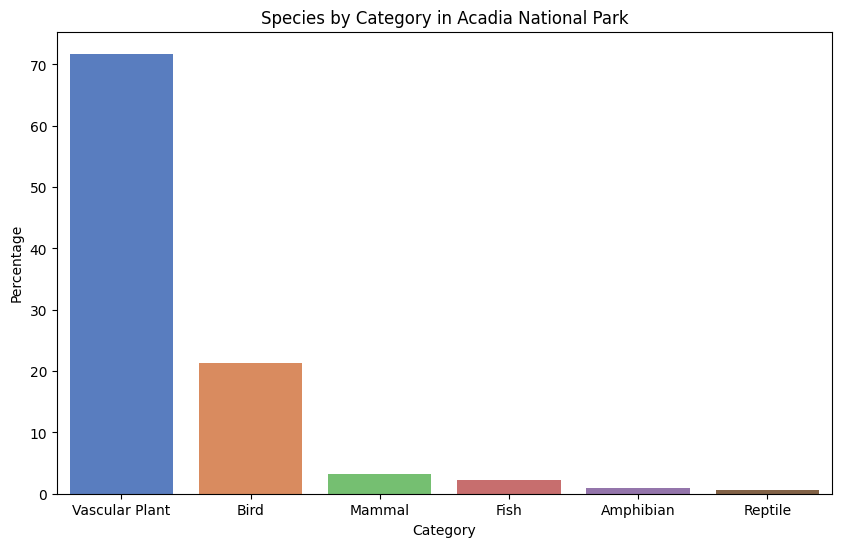

In [8]:
category_percent_df = category_percent.reset_index()
category_percent_df.columns = ["Category", "Percentage"]

plt.figure(figsize=(10,6))
sns.barplot(data=category_percent_df, x="Category", y="Percentage", palette="muted")

plt.title("Species by Category in Acadia National Park")


In [9]:
yosemite = animal_df[animal_df["Park Name"] == "Yosemite National Park"]

yos_count = yosemite["Category"].value_counts()

yos_percentage = (yos_count/yos_count.sum()) * 100

yosemite_percentage = yos_percentage.round(2)

print("Percentages for Yosemite National Park")
yosemite_percentage

Percentages for Yosemite National Park


Category
Vascular Plant    80.60
Bird              12.93
Mammal             4.21
Reptile            1.05
Amphibian          0.72
Fish               0.48
Name: count, dtype: float64

/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/3837206319.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yosemite_percent_df, x="Category",y="Percentage",palette="muted")


Text(0.5, 1.0, 'Species by Category in Yosemite National Park')

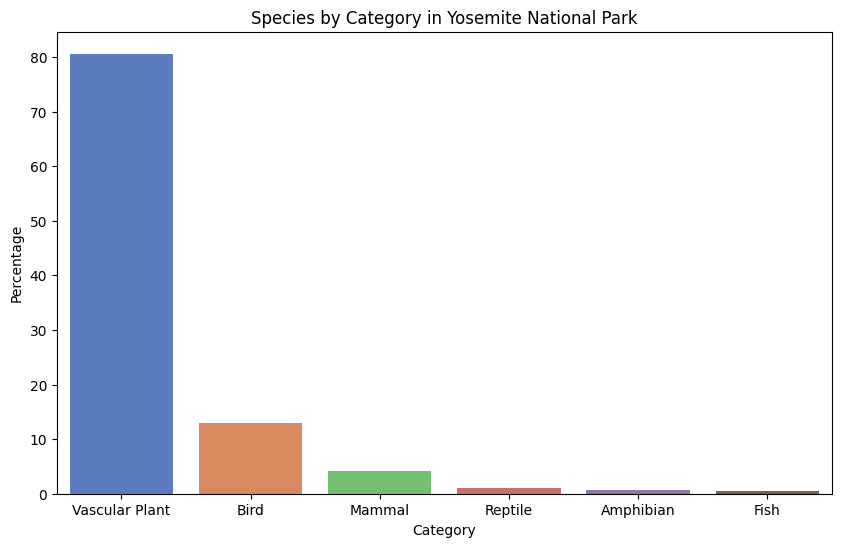

In [10]:
yosemite_percent_df = yosemite_percentage.reset_index()

yosemite_percent_df.columns = ["Category", "Percentage"]

plt.figure(figsize=(10,6))
sns.barplot(data=yosemite_percent_df, x="Category",y="Percentage",palette="muted")

plt.title("Species by Category in Yosemite National Park")

In [11]:
gsm = animal_df[animal_df["Park Name"] == "Great Smoky Mountains National Park"]

gsm_count = gsm["Category"].value_counts()

gsm_percentage = (gsm_count / gsm_count.sum()) * 100

smoky = gsm_percentage.round(2)

print("Percentages for Great Smoky Mountains National Park")
smoky

Percentages for Great Smoky Mountains National Park


Category
Insect                 36.45
Vascular Plant         32.83
Fungi                   9.54
Nonvascular Plant       7.97
Bird                    4.11
Fish                    1.62
Spider/Scorpion         1.57
Mammal                  1.42
Slug/Snail              1.39
Invertebrate            1.27
Amphibian               0.92
Reptile                 0.77
Crab/Lobster/Shrimp     0.15
Name: count, dtype: float64

/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/1930322348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gsm_df, x="Category", y="Percentage",palette="muted")


Text(0.5, 1.0, 'Species by category in the Great Smoky Mountains')

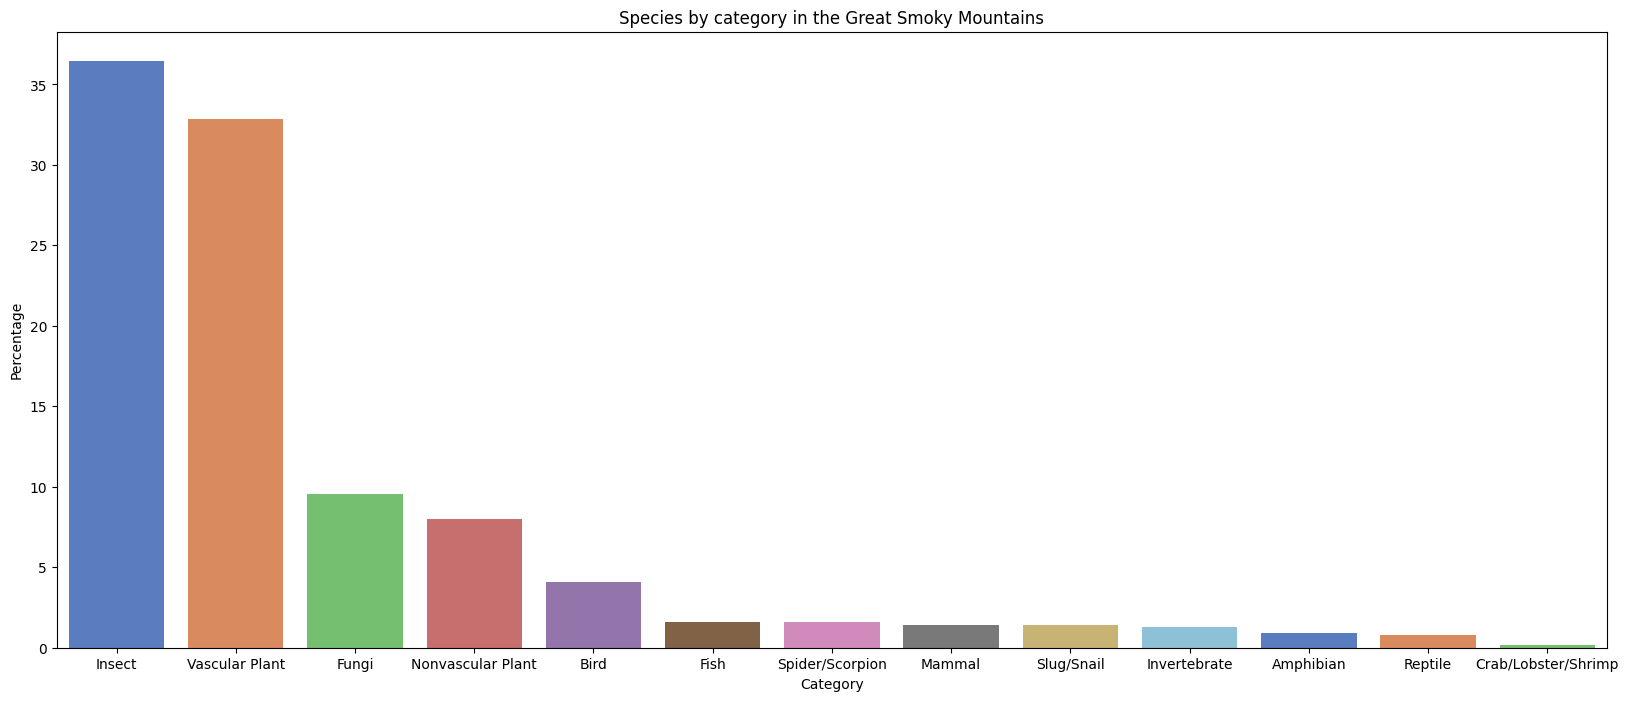

In [12]:
gsm_df = smoky.reset_index()

gsm_df.columns = ["Category","Percentage"]

plt.figure(figsize=(20,8))
sns.barplot(data=gsm_df, x="Category", y="Percentage",palette="muted")

plt.title("Species by category in the Great Smoky Mountains")


In [13]:
## Great Smoky Mountain National Park and Redwood National Park seem to have the most species so i am 
## going to use those parks to compare for a question

redw = animal_df[animal_df["Park Name"] == "Redwood National Park"]

redw["Nativeness"] = redw["Nativeness"].fillna("Uknown")

rw_count = redw["Category"].value_counts()
redw_percentage = (rw_count / rw_count.sum()) * 100

redwood = redw_percentage.round(2)
print("Percentages for Redwood National Park")
redwood





Percentages for Redwood National Park


/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/1168995172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redw["Nativeness"] = redw["Nativeness"].fillna("Uknown")


Category
Vascular Plant         35.77
Fungi                  21.60
Insect                 11.79
Bird                    7.94
Invertebrate            5.29
Nonvascular Plant       3.98
Fish                    3.91
Mammal                  2.44
Slug/Snail              2.33
Crab/Lobster/Shrimp     1.93
Algae                   1.76
Reptile                 0.62
Amphibian               0.52
Spider/Scorpion         0.11
Name: count, dtype: float64

/var/folders/52/31hzb96d29g4fyt7wgjkzdb40000gn/T/ipykernel_40681/1198336625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rw_df, x="Category",y="Percentage",palette="muted")


Text(0.5, 1.0, 'Species by Category in Redwood National Park')

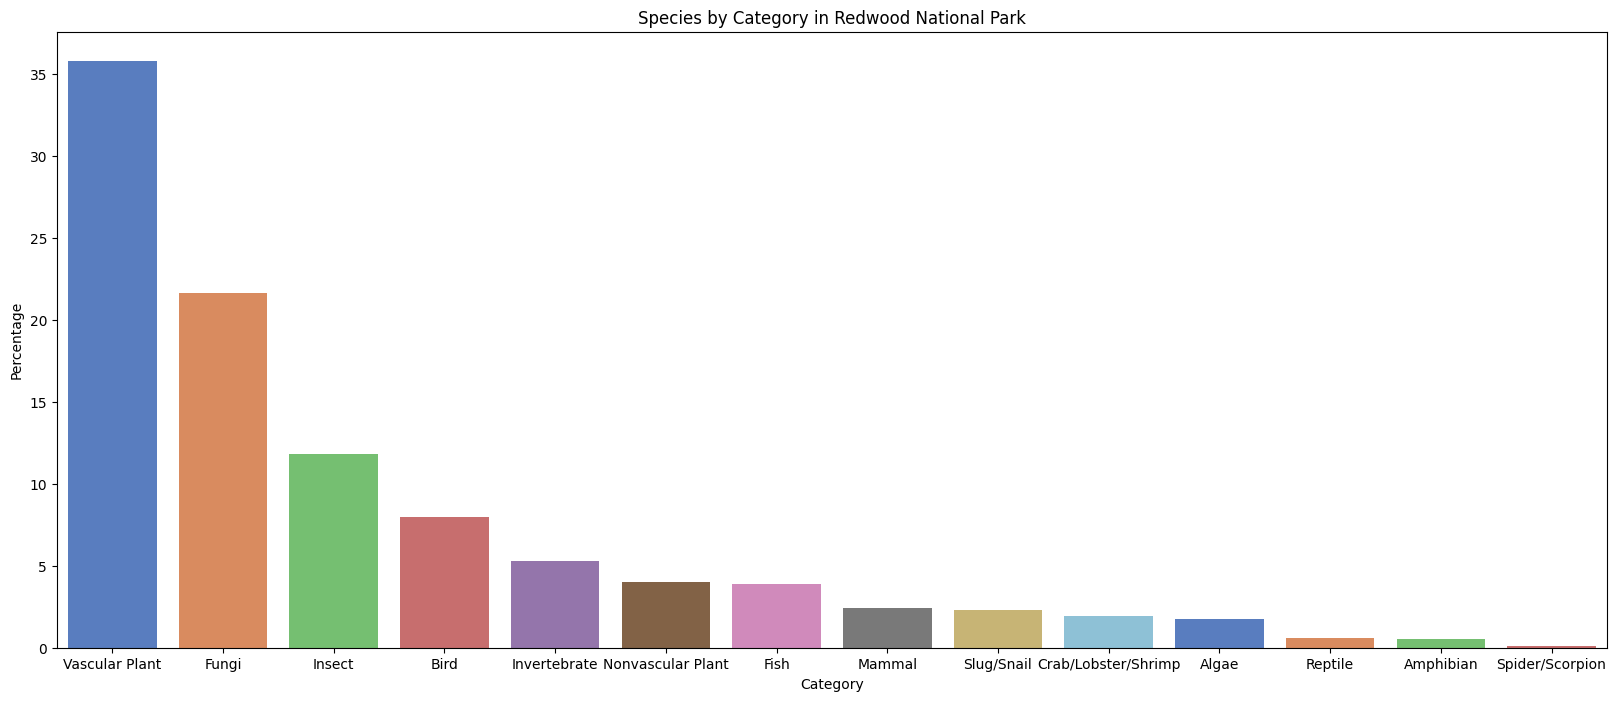

In [14]:


rw_df = redwood.reset_index()

rw_df.columns = ["Category","Percentage"]
plt.figure(figsize=(20,8))
sns.barplot(data=rw_df, x="Category",y="Percentage",palette="muted")

plt.title("Species by Category in Redwood National Park")

In [15]:
# Count how many are present
present_count = (animal_df["Occurrence"] == "Present").sum()

# Count how many are absent (everything else)
absent_count = (animal_df["Occurrence"] != "Present").sum()

print("Present species:", present_count)
print("Absent species:", absent_count)





Present species: 83278
Absent species: 35970


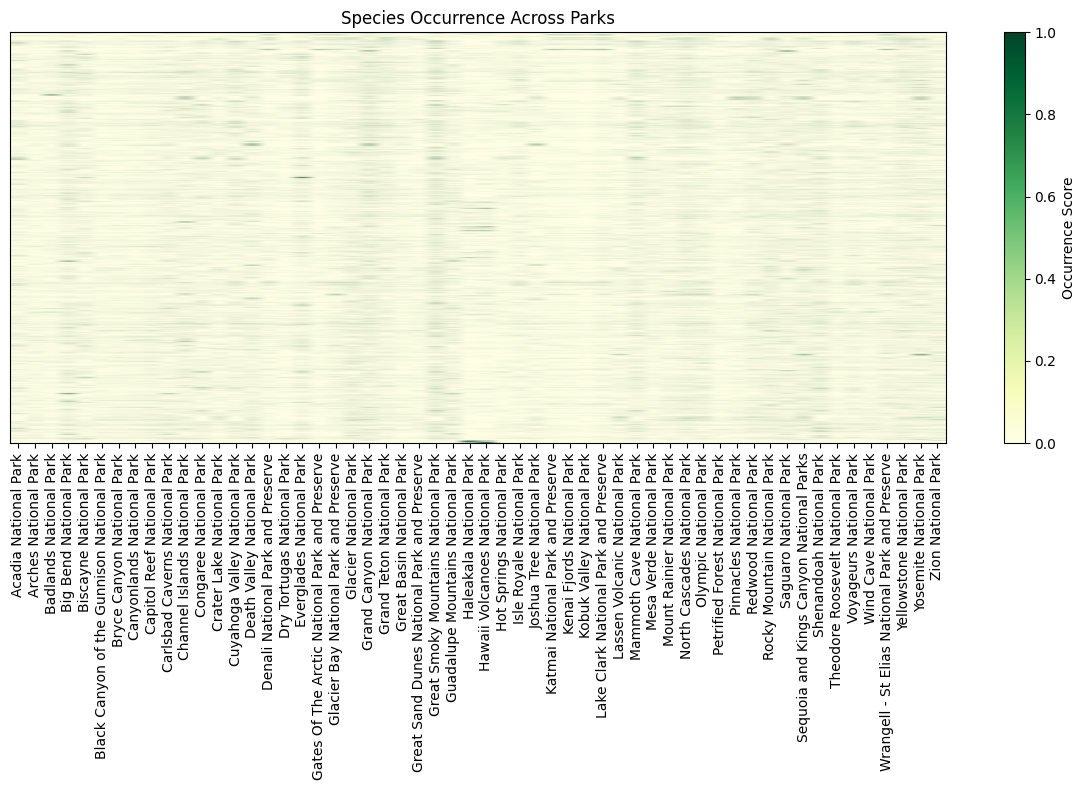

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Map occurrence to numeric
occ_map = {"Present": 1, "Not Confirmed": 0.5, "Not Present (Historical)": 0}
animal_df["Occurrence_num"] = animal_df["Occurrence"].map(occ_map)

# Pivot with numeric values
matrix = animal_df.pivot_table(
    index="Common Names",
    columns="Park Name",
    values="Occurrence_num",
    aggfunc="max"  # max ensures if multiple rows exist, "Present" wins
)

# Plot
plt.figure(figsize=(12,8))
plt.imshow(matrix.fillna(0).astype(float), cmap="YlGn", aspect="auto")
plt.colorbar(label="Occurrence Score")
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks([])
plt.title("Species Occurrence Across Parks")
plt.tight_layout()
plt.show()





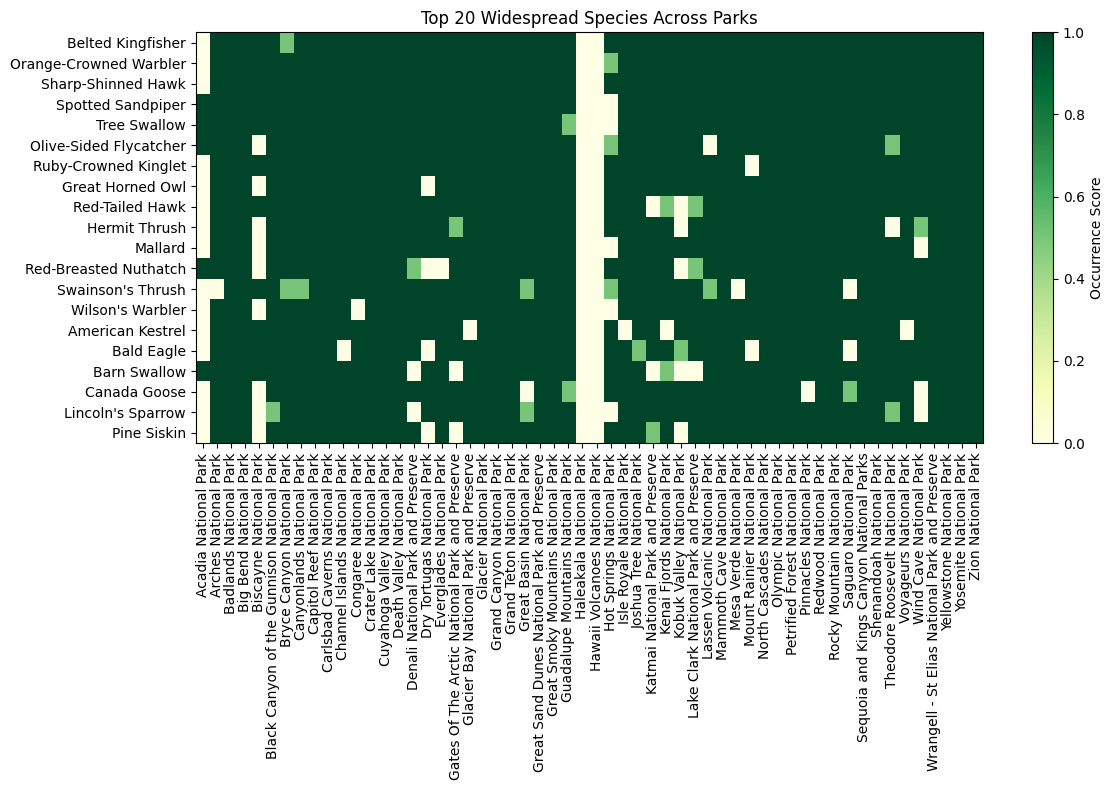

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Map occurrence to numeric values
occ_map = {"Present": 1, "Not Confirmed": 0.5, "Not Present (Historical)": 0}
animal_df["Occurrence_num"] = animal_df["Occurrence"].map(occ_map)

# Pivot table: species × parks
species_matrix = animal_df.pivot_table(
    index="Common Names",
    columns="Park Name",
    values="Occurrence_num",
    aggfunc="max"
)

# Pick the top N species that appear in the most parks
top_species = species_matrix.notna().sum(axis=1).nlargest(20).index
species_subset = species_matrix.loc[top_species]

# Plot
plt.figure(figsize=(12,8))
plt.imshow(species_subset.fillna(0), cmap="YlGn", aspect="auto")
plt.colorbar(label="Occurrence Score")
plt.xticks(range(len(species_subset.columns)), species_subset.columns, rotation=90)
plt.yticks(range(len(species_subset.index)), species_subset.index)
plt.title("Top 20 Widespread Species Across Parks")
plt.tight_layout()
plt.show()


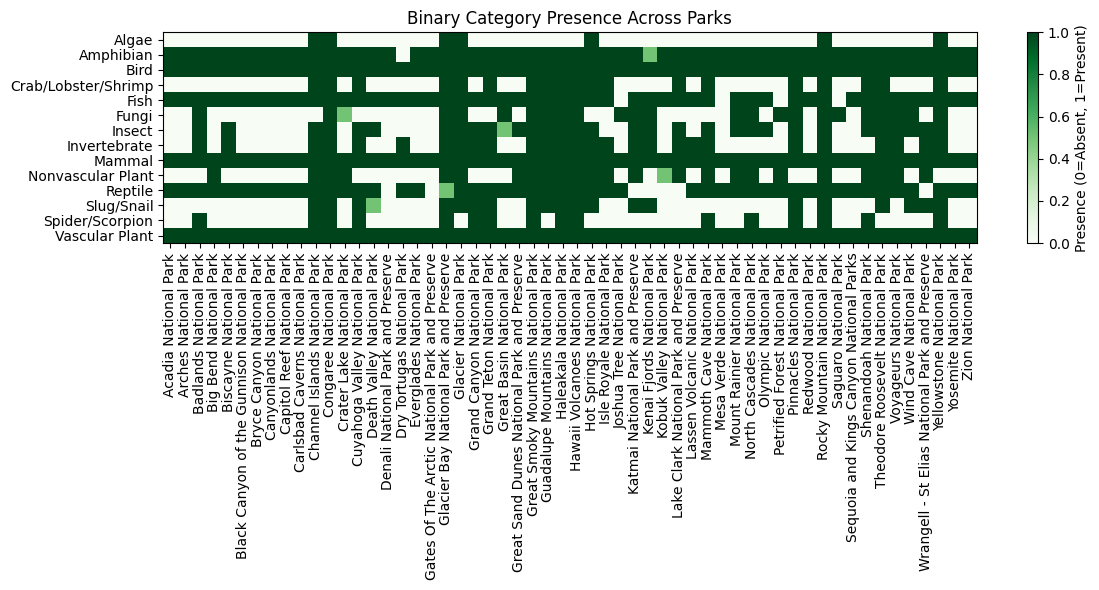

In [18]:
# Pivot: does any species in category appear in the park?
cat_matrix_binary = animal_df.pivot_table(
    index="Category",
    columns="Park Name",
    values="Occurrence_num",
    aggfunc="max"   # max(0,1) → 1 if ANY species present, 0 if none
)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(cat_matrix_binary.fillna(0), cmap="Greens", aspect="auto")
plt.colorbar(label="Presence (0=Absent, 1=Present)")
plt.xticks(range(len(cat_matrix_binary.columns)), cat_matrix_binary.columns, rotation=90)
plt.yticks(range(len(cat_matrix_binary.index)), cat_matrix_binary.index)
plt.title("Binary Category Presence Across Parks")
plt.tight_layout()
plt.show()



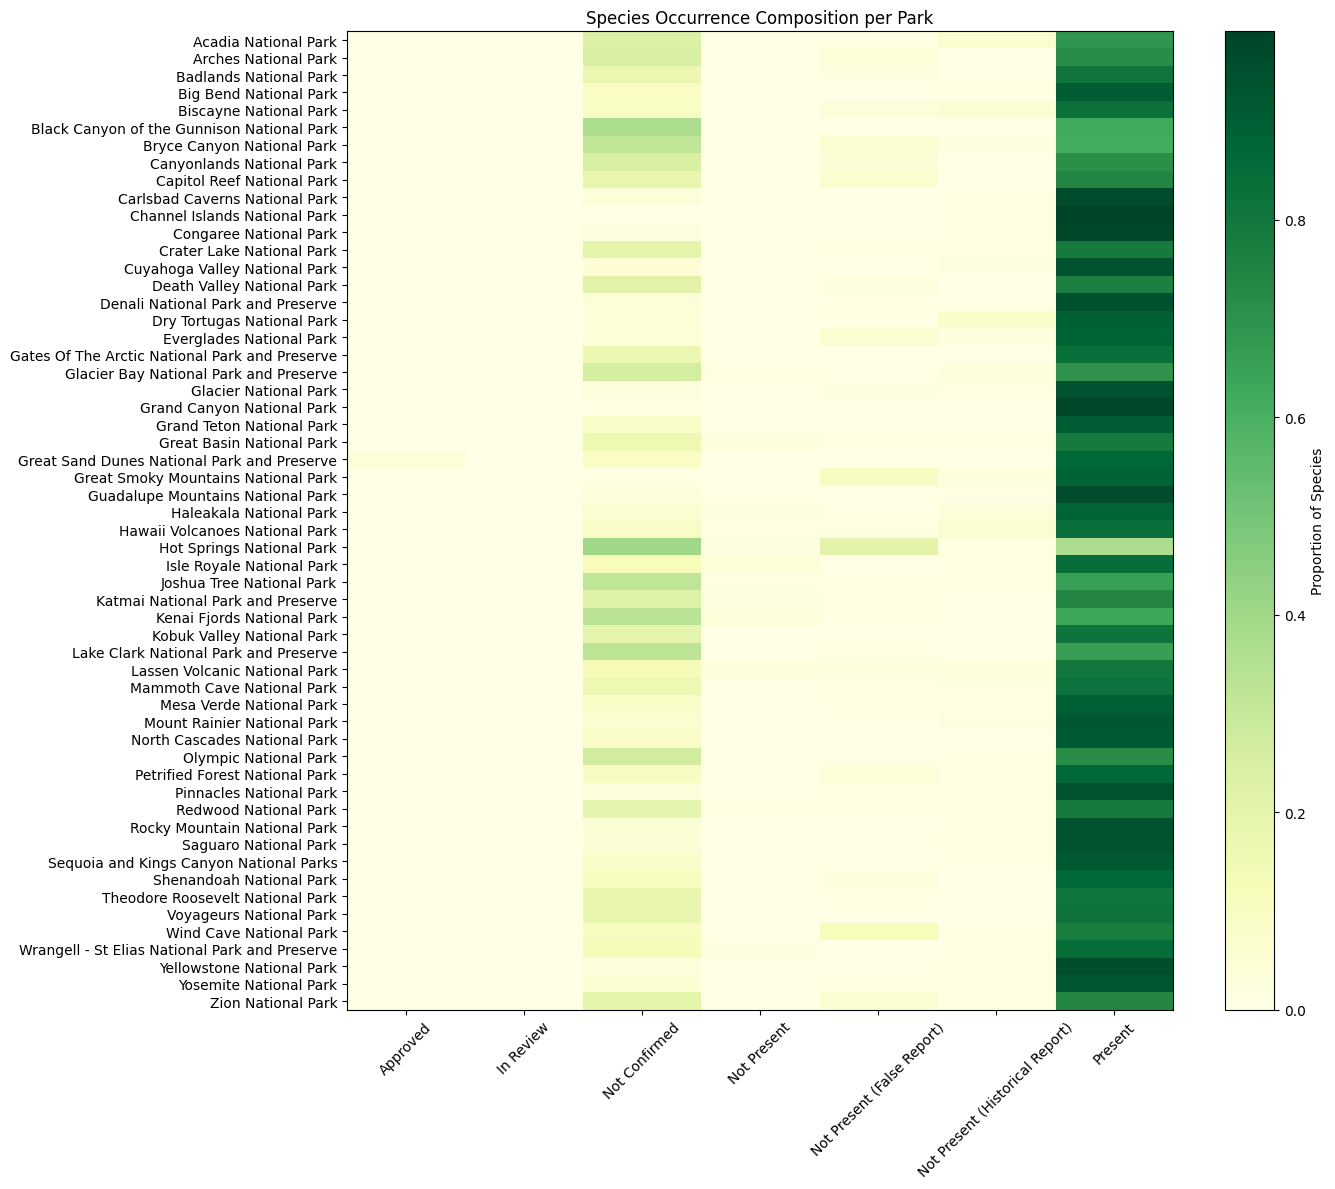

In [19]:
# Count species occurrence per park
park_richness = animal_df.groupby(["Park Name", "Occurrence"]).size().unstack(fill_value=0)

# Normalize to proportions (optional)
park_richness_prop = park_richness.div(park_richness.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(14,12))
plt.imshow(park_richness_prop, cmap="YlGn", aspect="auto")
plt.colorbar(label="Proportion of Species")
plt.xticks(range(len(park_richness_prop.columns)), park_richness_prop.columns, rotation=45)
plt.yticks(range(len(park_richness_prop.index)), park_richness_prop.index)
plt.title("Species Occurrence Composition per Park")
plt.tight_layout()
plt.show()
